# **MBA Admission, Class 2025 from Wharton School, University of Pennyslavia**

## By: Deren Tanaphan (22/503261/TK/54976)

Dataset Source: https://www.kaggle.com/datasets/taweilo/mba-admission-dataset

## **Import Useful Library**

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Preparation**

In [213]:
## Load the data
df = pd.read_csv('data/MBA.csv')

In [214]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.00,STEM,White,650.0,2.0,Other,Admit
1,2,Female,False,3.01,STEM,White,570.0,2.0,Consulting,Admit
2,3,Female,True,3.44,Business,NaN,590.0,1.0,Consulting,Admit
3,4,Female,True,3.05,Business,NaN,680.0,1.0,Technology,Admit
4,5,Female,False,3.10,Humanities,Hispanic,670.0,0.0,NaN,Waitlist


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4264 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   5785 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [216]:
df.shape

(6194, 10)

## **Data Cleaning**

### **Handle Null Value**

In [217]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1930
gmat                 0
work_exp             0
work_industry      409
admission         5194
dtype: int64

In [218]:
# Check unique values in race column
df.race.unique()

array(['White', nan, 'Hispanic', 'Asian', 'Black', 'Other'], dtype=object)

In [219]:
df.race.value_counts()

race
White       1426
Asian       1112
Black        918
Hispanic     594
Other        214
Name: count, dtype: int64

We get insight that column **race** has value:
- White
- Hispanic
- Asian
- Black
- Other
- nan (missing value)

I decide to fill the missing value with **Other**

In [220]:
df['race'].fillna('Other', inplace=True)

df.isnull().sum()

/tmp/ipykernel_2880/3513706636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['race'].fillna('Other', inplace=True)


application_id       0
gender               0
international        0
gpa                  0
major                0
race                 0
gmat                 0
work_exp             0
work_industry      409
admission         5194
dtype: int64

Next, we will handle null value in **work_industry** column

In [221]:
df.work_industry.unique()

array(['Other', 'Consulting', 'Technology', nan, 'Nonprofit/Gov', 'PE/VC',
       'Investment Banking', 'Investment Management', 'Health Care',
       'Financial Services', 'Real Estate', 'Media/Entertainment', 'CPG',
       'Retail', 'Energy'], dtype=object)

In [222]:
df.work_industry.value_counts()

work_industry
Consulting               1575
PE/VC                     817
Technology                707
Nonprofit/Gov             580
Investment Banking        537
Other                     402
Financial Services        392
Health Care               275
Investment Management     165
CPG                       111
Real Estate               104
Media/Entertainment        58
Retail                     36
Energy                     26
Name: count, dtype: int64

Same as before, we will handle null value in this column by fill the missing value with **Other**

In [223]:
df['work_industry'].fillna('Other', inplace=True)

df.isnull().sum()

/tmp/ipykernel_2880/372973618.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_industry'].fillna('Other', inplace=True)


application_id       0
gender               0
international        0
gpa                  0
major                0
race                 0
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [224]:
df.work_industry.unique()

array(['Other', 'Consulting', 'Technology', 'Nonprofit/Gov', 'PE/VC',
       'Investment Banking', 'Investment Management', 'Health Care',
       'Financial Services', 'Real Estate', 'Media/Entertainment', 'CPG',
       'Retail', 'Energy'], dtype=object)

Now, we need to grouping **work_industry** to **business** & **non business**

In [225]:
business_industries = [
    'Consulting', 'Technology', 'PE/VC', 'Investment Banking', 
    'Investment Management', 'Financial Services', 'Real Estate'
]
non_business_industries = [
    'Other', 'Nonprofit/Gov', 'Health Care', 'Media/Entertainment', 
    'CPG', 'Retail', 'Energy'
]

df['work_industry'] = df['work_industry'].apply(
    lambda x: 'business' if x in business_industries else 'non business'
)

Last, we will handle null values in **admission** columns

In [226]:
df.admission.unique()

array(['Admit', 'Waitlist', nan], dtype=object)

In [227]:
df.admission.value_counts()

admission
Admit       900
Waitlist    100
Name: count, dtype: int64

Its reasonable to fill the null value with **Decline** because logicaly admission will have **Decline** state.

In [228]:
df['admission'].fillna('Decline', inplace=True)

df.isnull().sum()

/tmp/ipykernel_2880/2279195060.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('Decline', inplace=True)


application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

And then, the **Waitlist** state will not useful for us. So we will drop the row that have **waitlist** state

In [229]:
df = df[df['admission'] != 'Waitlist']
df.admission.value_counts()

admission
Decline    5194
Admit       900
Name: count, dtype: int64

### **Handle Duplicates**

In [230]:
df[df.duplicated()]

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission


There are no rows that duplicate. 

### **Fixing Inconsistent Data**

To avoiding inconsistent data on string variable, i decided to change all character to lower case

In [231]:
df['gender'] = df['gender'].str.lower()
df['major'] = df['major'].str.lower()
df['race'] = df['race'].str.lower()
df['work_industry'] = df['work_industry'].str.lower()
df['admission'] = df['admission'].str.lower()

df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,female,False,3.00,stem,white,650.0,2.0,non business,admit
1,2,female,False,3.01,stem,white,570.0,2.0,business,admit
2,3,female,True,3.44,business,other,590.0,1.0,business,admit
3,4,female,True,3.05,business,other,680.0,1.0,business,admit
5,6,male,True,3.54,business,other,740.0,1.0,business,decline


### **Outlier Detection**

In [232]:
df.describe()

,application_id,gpa,gmat,work_exp
count,6094.000000,6094.00000,6094.000000,6094.000000
mean,3123.818510,3.24819,650.103380,2.001805
std,1776.486394,0.15269,49.257135,1.041639
min,1.000000,2.70000,570.000000,-2.000000
25%,1598.250000,3.15000,610.000000,1.000000
50%,3128.500000,3.25000,650.000000,2.000000
75%,4658.750000,3.35000,680.000000,3.000000
max,6193.000000,3.83000,780.000000,6.000000


From the dataset source, **work_exp** is a column that consist number of years of work experience (Year). It doesn't make sense that a person has negative working experience. So, i will change the work_exp values that below 0 to 0

In [233]:
df['work_exp'] = df['work_exp'].apply(lambda x: 0 if x < 0 else x)

df.describe()

,application_id,gpa,gmat,work_exp
count,6094.000000,6094.00000,6094.000000,6094.000000
mean,3123.818510,3.24819,650.103380,2.008697
std,1776.486394,0.15269,49.257135,1.024606
min,1.000000,2.70000,570.000000,-0.000000
25%,1598.250000,3.15000,610.000000,1.000000
50%,3128.500000,3.25000,650.000000,2.000000
75%,4658.750000,3.35000,680.000000,3.000000
max,6193.000000,3.83000,780.000000,6.000000


### **Convert Column Data Type**

In [234]:
# Check number of unique values in each column
df.nunique()

application_id    6094
gender               2
international        2
gpa                104
major                3
race                 5
gmat                22
work_exp             7
work_industry        2
admission            2
dtype: int64

We need to change **gender**, **international**, **major**, **race**, and **admission** columns data type into categorical

In [235]:
col_to_change = ['gender', 'international', 'major', 'race', 'admission']
df[col_to_change] = df[col_to_change].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6094 entries, 0 to 6192
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   application_id  6094 non-null   int64   
 1   gender          6094 non-null   category
 2   international   6094 non-null   category
 3   gpa             6094 non-null   float64 
 4   major           6094 non-null   category
 5   race            6094 non-null   category
 6   gmat            6094 non-null   float64 
 7   work_exp        6094 non-null   float64 
 8   work_industry   6094 non-null   object  
 9   admission       6094 non-null   category
dtypes: category(5), float64(3), int64(1), object(1)
memory usage: 316.1+ KB


## **Data Integration**

In [236]:
corr_matrix = df.corr(numeric_only=True)

print(corr_matrix)

                application_id       gpa      gmat  work_exp
application_id        1.000000  0.017873  0.015974  0.006680
gpa                   0.017873  1.000000  0.570084  0.002493
gmat                  0.015974  0.570084  1.000000 -0.012375
work_exp              0.006680  0.002493 -0.012375  1.000000


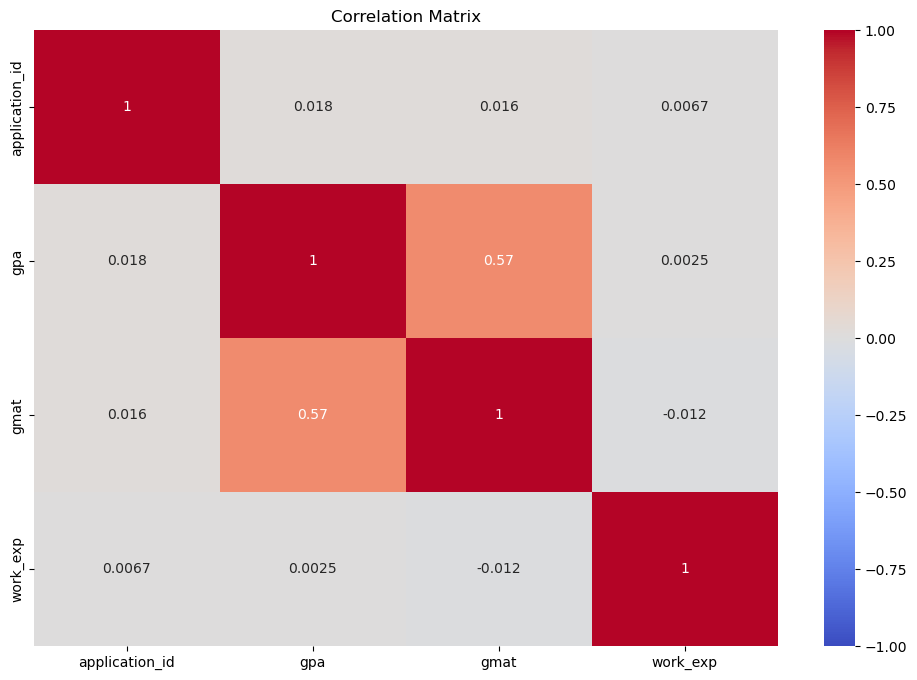

In [237]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

There are no high correlation between numerical variable, so its OK

## **Data Reduction**

In [238]:
df['application_id'].nunique()

6094

**application_id** column has large amount of unique values. So, this column is just unique identifier & does not have a valuable meaning for our data. We should remove this column

In [239]:
df = df.drop('application_id', axis=1)

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,female,False,3.00,stem,white,650.0,2.0,non business,admit
1,female,False,3.01,stem,white,570.0,2.0,business,admit
2,female,True,3.44,business,other,590.0,1.0,business,admit
3,female,True,3.05,business,other,680.0,1.0,business,admit
5,male,True,3.54,business,other,740.0,1.0,business,decline


## **EDA**

### 1. Influence of Gender to Admission

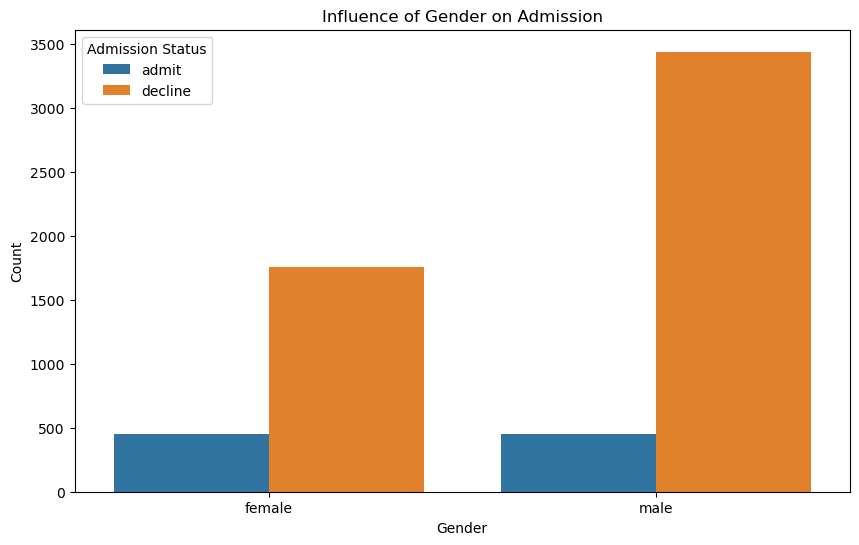

In [240]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='gender', hue='admission')
plt.title('Influence of Gender on Admission')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.show()

### 2. Influence International Students to Admission

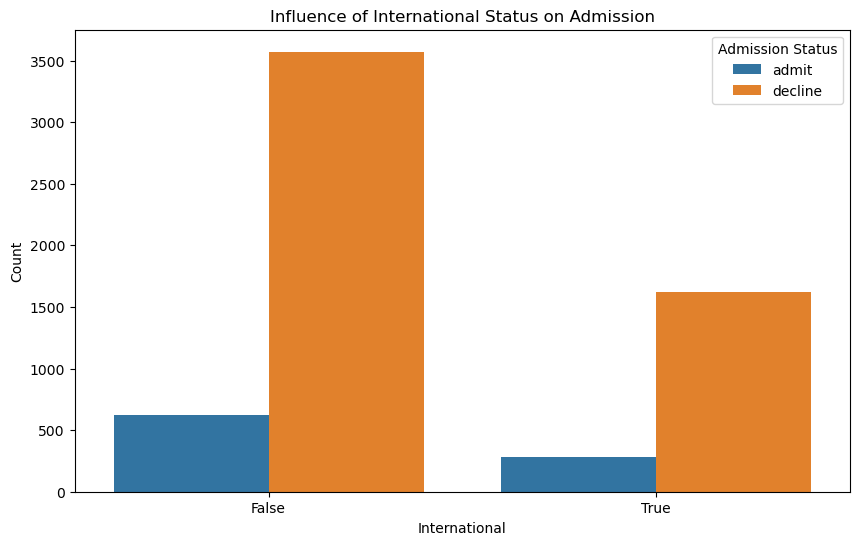

In [241]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='international', hue='admission')
plt.title('Influence of International Status on Admission')
plt.xlabel('International')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.show()

### 3. Influence GPA & GMAT to Admission

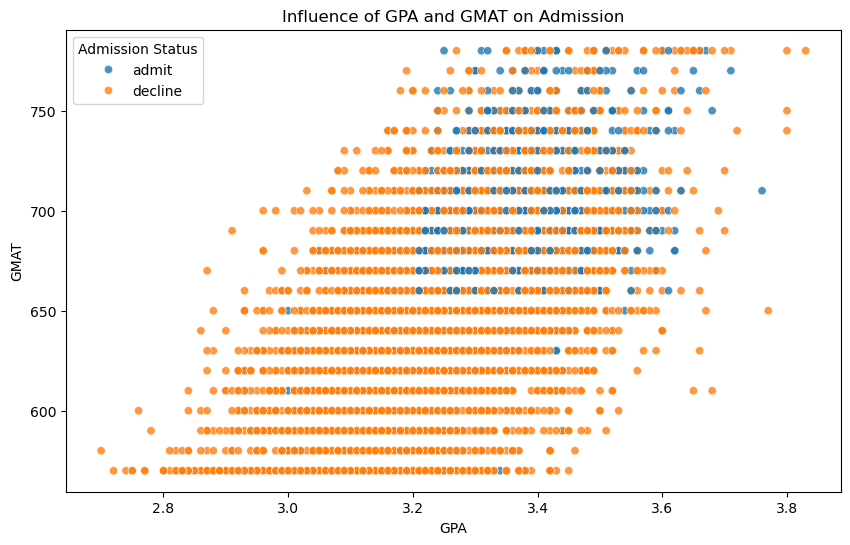

In [247]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gpa', y='gmat', hue='admission', alpha=0.8)
plt.title('Influence of GPA and GMAT on Admission')
plt.xlabel('GPA')
plt.ylabel('GMAT')
plt.legend(title='Admission Status')
plt.show()

### 4. Influence Major to Admission

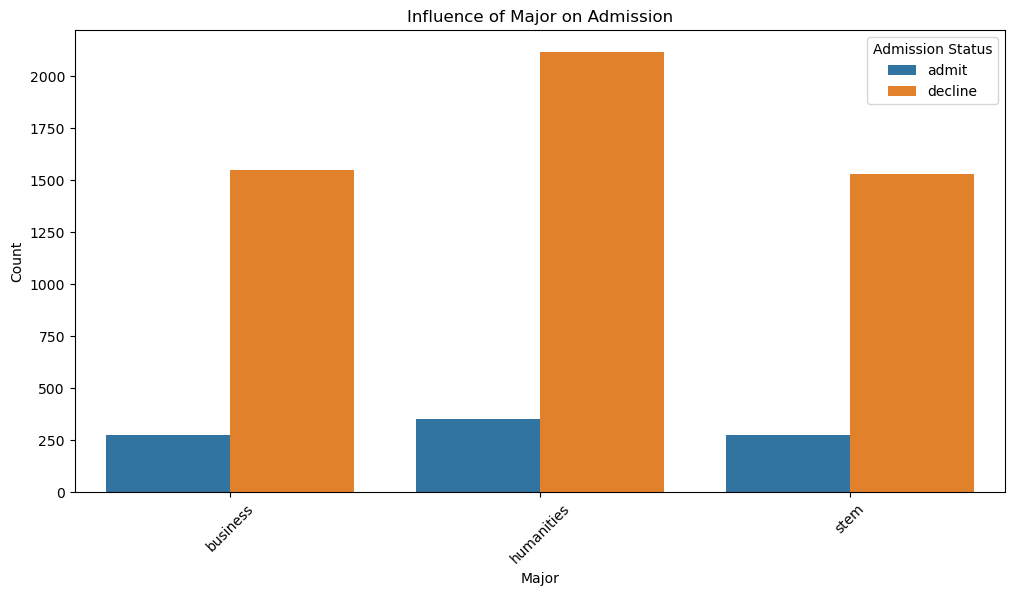

In [243]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='major', hue='admission')
plt.title('Influence of Major on Admission')
plt.xlabel('Major')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.xticks(rotation=45)
plt.show()

### 5. Influence Working Experience to Admission

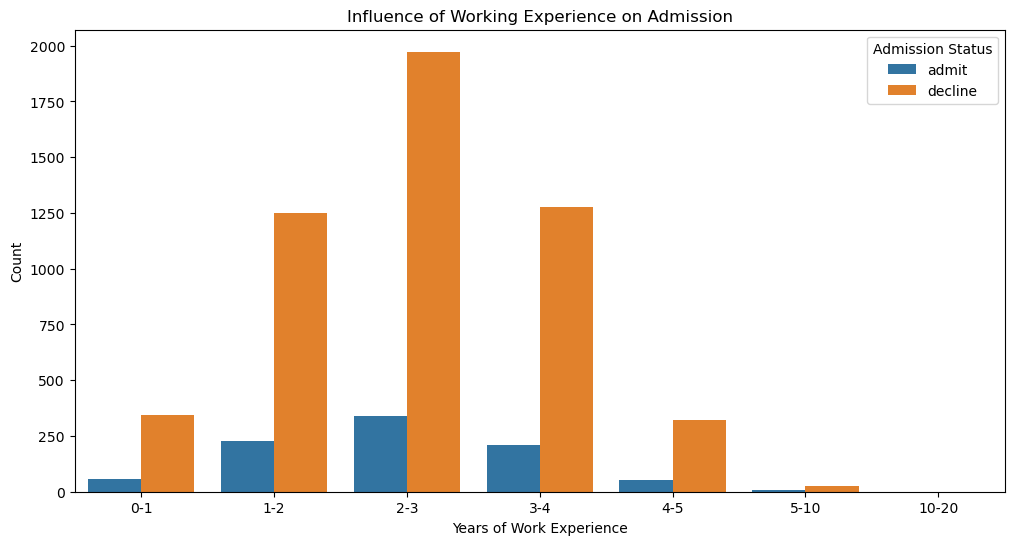

In [244]:
# Create bins for work experience
bins = [0, 1, 2, 3, 4, 5, 10, 20]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-20']
df['work_exp_bins'] = pd.cut(df['work_exp'], bins=bins, labels=labels, right=False)

# Plot the influence of working experience on admission
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='work_exp_bins', hue='admission')
plt.title('Influence of Working Experience on Admission')
plt.xlabel('Years of Work Experience')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.show()

### 6. Influence Work Industry to Admission

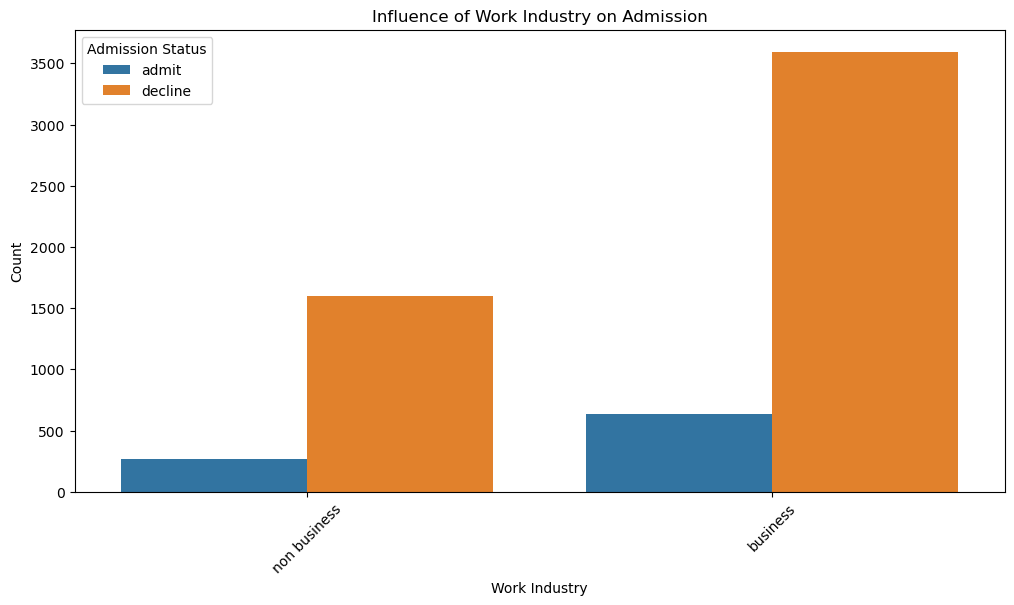

In [245]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='work_industry', hue='admission')
plt.title('Influence of Work Industry on Admission')
plt.xlabel('Work Industry')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.xticks(rotation=45)
plt.show()

### 7. Influence Race to Admission

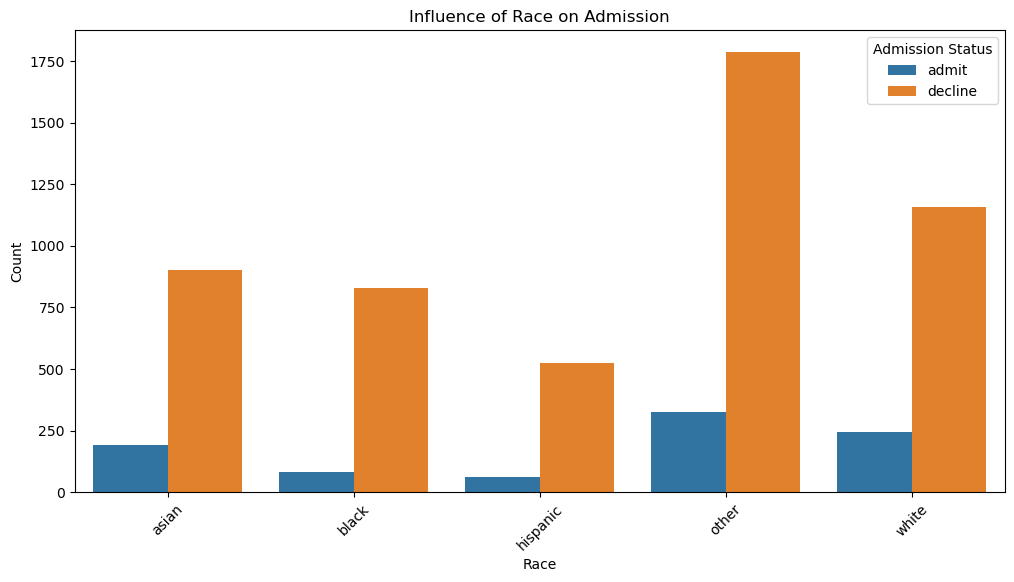

In [246]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race', hue='admission')
plt.title('Influence of Race on Admission')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Admission Status')
plt.xticks(rotation=45)
plt.show()